In [1]:
# Import libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt

# Import functions
import av_api 
import user_inputs
import interactive_widgets as iw

%matplotlib inline

In [9]:
api_key = "DK97BGD2FUMQXGZX"
tickers = user_inputs.get_user_input_tickers()
start = user_inputs.get_user_dates()
end = user_inputs.get_user_dates()
stock_data = av_api.get_stock_data(tickers, start, end, api_key)
stock_data.head(10)

Ticker      CMCSA                                        NFLX            \
Stock Info   open    high     low  close      volume     open      high   
date                                                                      
2023-10-20  42.86  43.340  42.320  42.86  22457698.0  405.630  410.6400   
2023-10-19  44.19  44.340  42.990  43.07  17908925.0  404.740  408.9500   
2023-10-18  44.28  44.520  43.900  44.02  13384770.0  351.000  354.7900   
2023-10-17  44.22  44.700  44.095  44.36  15746161.0  361.100  362.7049   
2023-10-16  44.05  44.325  43.765  44.25  17065482.0  356.210  363.0799   
2023-10-13  43.90  44.070  43.505  43.81  16559148.0  355.640  358.9300   
2023-10-12  44.34  44.460  43.795  43.90  16757197.0  366.480  368.8300   
2023-10-11  44.64  44.925  44.090  44.24  16840328.0  372.775  377.8100   
2023-10-10  44.24  44.660  43.820  44.47  15558534.0  385.580  388.7000   
2023-10-09  43.46  44.240  43.355  44.09  15734661.0  378.050  387.1700   

Ticker                                    ...      CVX                    \
Stock Info       low   close      volume  ...     open    high       low   
date                                      ...                              
2023-10-20  398.0100  400.96  12782922.0  ...  168.410  169.10  166.0950   
2023-10-19  392.2601  401.77  28074416.0  ...  168.700  170.17  167.5100   
2023-10-18  344.7300  346.19  11429643.0  ...  168.470  169.70  167.5817   
2023-10-17  353.8900  355.72   5908412.0  ...  164.830  168.20  164.6500   
2023-10-16  354.7700  360.82   5128947.0  ...  165.340  165.81  163.8500   
2023-10-13  352.0500  355.68   6316320.0  ...  163.410  164.84  162.3000   
2023-10-12  359.0500  361.20   7376086.0  ...  163.260  163.26  160.9000   
2023-10-11  365.3400  365.93   9151395.0  ...  165.070  165.08  160.4800   
2023-10-10  372.2500  373.32   7288939.0  ...  166.765  167.40  165.6750   
2023-10-09  377.7550  385.95   3299802.0  ...  166.380  168.19  164.9500   

Ticker                             AVGO                                      
Stock Info   close      volume     open     high     low   close     volume  
date                                                                         
2023-10-20  166.83   7458286.0  874.900  874.900  851.84  853.63  2695307.0  
2023-10-19  169.10   6580157.0  887.020  889.490  865.67  867.83  2661970.0  
2023-10-18  168.92   6893452.0  879.945  895.630  875.20  887.03  2040434.0  
2023-10-17  167.59   7538316.0  885.150  892.980  866.00  884.40  3300834.0  
2023-10-16  165.40   5445954.0  890.970  915.785  890.97  902.57  2115048.0  
2023-10-13  164.06   8044677.0  909.000  925.910  882.09  883.18  2833352.0  
2023-10-12  161.23   7396969.0  876.430  917.930  876.43  905.60  4387055.0  
2023-10-11  161.10  12570718.0  859.710  875.340  856.55  874.56  1433412.0  
2023-10-10  166.54   6512874.0  857.150  872.545  855.72  858.41  1471807.0  
2023-10-09  166.72   8183490.0  840.460  856.610  837.83  855.88  1575985.0  

[10 rows x 25 columns]

In [12]:
# Create a new empty DataFrame called returns. This dataframe will contain the returns for each stock.
returns = pd.DataFrame()

# Use pandas pct_change() method on the Close column to create a column representing this return value. 
# Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.
for tick in tickers:
    returns[tick+' Return'] = stock_data[tick]['close'].pct_change()
returns.head(10)    

,CMCSA Return,NFLX Return,ADBE Return,CVX Return,AVGO Return
date,,,,,
2023-10-20,NaN,NaN,NaN,NaN,NaN
2023-10-19,0.004900,0.002020,0.027322,0.013607,0.016635
2023-10-18,0.022057,-0.138338,0.003833,-0.001064,0.022124
2023-10-17,0.007724,0.027528,0.003979,-0.007874,-0.002965
2023-10-16,-0.002480,0.014337,-0.016694,-0.013068,0.020545
2023-10-13,-0.009944,-0.014245,-0.003595,-0.008102,-0.021483
2023-10-12,0.002054,0.015520,0.019808,-0.017250,0.025386
2023-10-11,0.007745,0.013095,-0.017369,-0.000806,-0.034276
2023-10-10,0.005199,0.020195,-0.031260,0.033768,-0.018466


In [2]:
my_returns = iw.create_column_plot_widget(returns)
my_returns

NameError: name 'returns' is not defined

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2020. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2020**

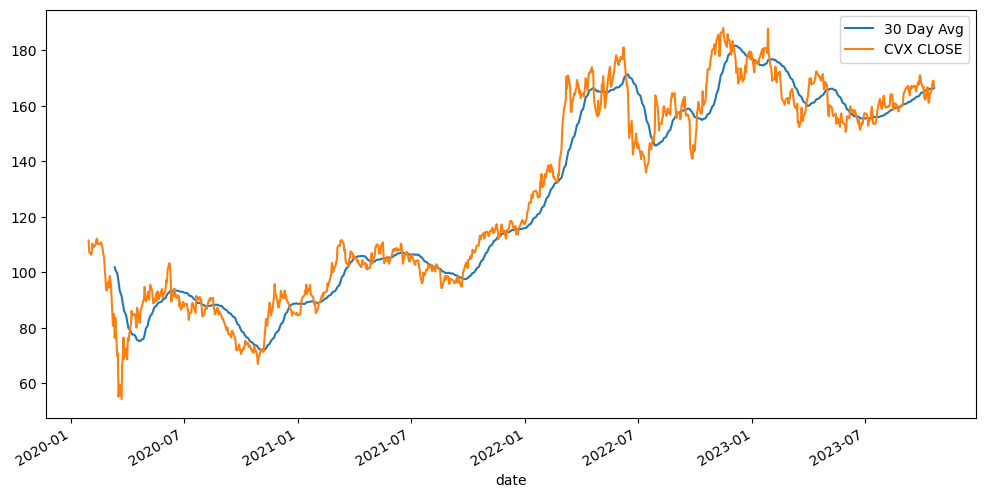

In [16]:
# sort it in ascending order
user_ticker = user_inputs.get_user_input_one_ticker(stock_data)
tick_data = stock_data[user_ticker].sort_index()
start_date = user_inputs.get_user_dates()
plt.figure(figsize=(12,6))
tick_data['close'].loc[start_date:].rolling(window=30).mean().plot(label='30 Day Avg')
tick_data['close'].loc[start_date:].plot(label=user_ticker+ ' CLOSE')
plt.legend()

TBA

In [19]:
# Example usage:
tab_widget = iw.create_tab_widget(stock_data, returns)
tab_widget